### Trabalho Final De Estatística Aplicada

#### Diário de Análises

  1 -  Carlos Reis do Grupo1 - Quinteto Fantástico entrou em contato com o Renato Gonçalves do Grupo3 - Data + para ajustar o dado de altura que foi colocado em metros e não no padrão que todos colocaram sem a virgula de 1,70 para 170.

  2 -  Renato Gonçalves do Grupo3 - Data + Realizou o ajuste das informações e atualizou o Carlos Reis do Grupo1 - Quinteto Fantástico e todos os alunos da sala por meio do Whatsapp da Sala

  3 - Foi entrado em contato com o Murilo  do Grupo3 - Data + pois tinha campo que não estava preenchido
  4 - Leonardo do Grupo3 - Data +  Mencionou no grupo para o Cesar Henrique de Freitas Barbosa do Grupo 10 - Exploradores Acadêmicos colocar os dados, pois estava vazio.
 
 5 - Carlos Reis do Grupo1 - Quinteto Fantástico  mencionou que tinham colocado Sexo com G fora do padrão, mas não houve o ajuste até o momento "01/12/2024" 

  Problemas:

  1 - Foi encotrado problema na coluna sexo, pois continha espaços o que causava falha na consolidação por sexo, foi realizado a remoção.
  
  2 - Foi desconsiderado o dados do "Cesar Henrique de Freitas Barbosa" do Grupo 10 - Exploradores Acadêmicos que não foi preenchido, foi mencionado no grupo da sala o ajuste que tinha de ser realizado, mas até o momento "01/12/2024" não houve ajuste 

  3 - O dados da "Grasiely Lima Pastori Vieira" do Grupo4 - The Powerpuff Girls em um dos registros continua errado com a Coluna sexo com a opção "G" que não existe na classificação padronizada "M ou F"


Análise dos Dados

### Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, shapiro, normaltest, probplot, chi2_contingency
import warnings

### Lendo a base

In [2]:
##df = pd.read_csv('C:\\GitHub\\Applied Statistics\\dados_dsa29.csv', sep = ',', encoding = 'utf-8')
df = pd.read_excel('C:\\GitHub\\Applied Statistics\\dados_dsa29.xlsx')
df= df.drop(["Unnamed: 13","Unnamed: 14","Unnamed: 15","Unnamed: 16","Unnamed: 17","Unnamed: 18"], axis=1)
df = df.dropna()

# Ajuste e tratamentos novos

In [3]:
df['pesquisador (aluno)'] = df['pesquisador (aluno)'].astype('str')
df['pesq_id'] =  df['pesq_id'].astype('int64')
df['idade'] =  df['idade'].astype('int64')
df['sexo'] = df['sexo'].astype(str)
df['peso'] =  df['peso'].astype('int64')
df['altura'] =  df['altura'].astype('int64')
df['estado_civil'] =  df['estado_civil'].astype('int64')
df['escolaridade'] =  df['escolaridade'].astype('int64')
df['consumo_alcool'] =  df['consumo_alcool'].astype('int64')
df['fumante'] =  df['fumante'].astype('int64')
df['exercícios'] =  df['exercícios'].astype('int64')
df['dieta'] =  df['dieta'].astype('int64')

df['sexo'] = df['sexo'].map(str.strip)
df.head(500)

,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,Allison Melo dos Santos,31,60060130,29,M,78,172,1,4,1,3,3,1
1,Allison Melo dos Santos,31,20040000,40,M,82,175,2,5,2,2,2,1
2,Allison Melo dos Santos,31,80010100,34,M,88,185,1,5,3,2,1,1
3,Allison Melo dos Santos,31,30130100,31,F,70,160,3,3,4,3,4,2
4,Allison Melo dos Santos,31,70750300,52,M,91,178,2,4,3,4,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Yago Costa dos Santos,38,5207080,35,M,56,176,3,7,4,2,1,2
404,Yago Costa dos Santos,38,5207080,50,F,85,160,1,4,4,2,3,4
405,Yago Costa dos Santos,38,5207080,29,F,65,164,1,2,5,2,4,4
406,Yago Costa dos Santos,38,5207080,28,M,75,170,1,4,4,2,1,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 407 entries, 0 to 407
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   pesquisador (aluno)  407 non-null    object
 1   pesq_id              407 non-null    int64 
 2   cep                  407 non-null    object
 3   idade                407 non-null    int64 
 4   sexo                 407 non-null    object
 5   peso                 407 non-null    int64 
 6   altura               407 non-null    int64 
 7   estado_civil         407 non-null    int64 
 8   escolaridade         407 non-null    int64 
 9   consumo_alcool       407 non-null    int64 
 10  fumante              407 non-null    int64 
 11  exercícios           407 non-null    int64 
 12  dieta                407 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 44.5+ KB


In [5]:
df_analise = df.iloc[:, 3:13]
df_analise

,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,29,M,78,172,1,4,1,3,3,1
1,40,M,82,175,2,5,2,2,2,1
2,34,M,88,185,1,5,3,2,1,1
3,31,F,70,160,3,3,4,3,4,2
4,52,M,91,178,2,4,3,4,1,2
...,...,...,...,...,...,...,...,...,...,...
403,35,M,56,176,3,7,4,2,1,2
404,50,F,85,160,1,4,4,2,3,4
405,29,F,65,164,1,2,5,2,4,4
406,28,M,75,170,1,4,4,2,1,4


In [6]:
# Validando valores nulos
df.isnull().sum()

pesquisador (aluno)    0
pesq_id                0
cep                    0
idade                  0
sexo                   0
peso                   0
altura                 0
estado_civil           0
escolaridade           0
consumo_alcool         0
fumante                0
exercícios             0
dieta                  0
dtype: int64

In [7]:
### Separando o dataframe por sexo
df_masculino = df[df['sexo'] == 'M']
df_feminino = df[df['sexo'] == 'F']

In [8]:
### Deixando somente os dados que quantitativos por sexo
df_masculino2 = df_masculino.iloc[:, 3:13]
df_feminino2 = df_feminino.iloc[:, 3:13]

#### Analisando a média, desvio padrão e intervalo de confiança para os dados quantitativos

Dados Quantitativos:
- Peso
- Altura
- Idade

In [9]:
df.head(1)

,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
0,Allison Melo dos Santos,31,60060130,29,M,78,172,1,4,1,3,3,1


In [10]:
# Média Peso
media_peso_masculino = sum(df_masculino2['peso'])/len(df_masculino2['peso'])
media_peso_feminino = sum(df_feminino2['peso'])/len(df_feminino2['peso'])

# Média Altura
media_altura_masculino = sum(df_masculino2['altura'])/len(df_masculino2['altura'])
media_altura_feminino = sum(df_feminino2['altura'])/len(df_feminino2['altura'])

# Média Idade
media_idade_masculino = sum(df_masculino2['idade'])/len(df_masculino2['idade'])
media_idade_feminino = sum(df_feminino2['idade'])/len(df_feminino2['idade'])


# Resultado
print(f'A média do peso masculino é: {media_peso_masculino:.2f}')
print(f'A média do peso feminino é: {media_peso_feminino:.2f}')
print(f'A média da altura masculina é: {media_altura_masculino:.2f}')
print(f'A média da altura feminina é: {media_altura_feminino:.2f}')
print(f'A média de idade masculina é: {media_idade_masculino:.2f}')
print(f'A média de idade feminina é: {media_idade_feminino:.2f}')

A média do peso masculino é: 82.94
A média do peso feminino é: 67.54
A média da altura masculina é: 172.23
A média da altura feminina é: 158.39
A média de idade masculina é: 35.52
A média de idade feminina é: 38.11


In [12]:
# Desvio Padrão Peso
desvio_padrao_peso_masculino = np.std(df_masculino2['peso'])
desvio_padrao_peso_feminino = np.std(df_feminino2['peso'])

# Desvio Padrão Altura
desvio_padrao_altura_masculino = np.std(df_masculino2['altura'])
desvio_padrao_altura_feminino = np.std(df_feminino2['altura'])

# Desvio Padrão Idade
desvio_padrao_idade_masculino = np.std(df_masculino2['idade'])
desvio_padrao_idade_feminino = np.std(df_feminino2['idade'])


# Resultado

print(f'O desvio padrão do peso masculino é: {desvio_padrao_peso_masculino:.2f}')
print(f'O desvio padrão do peso feminino é: {desvio_padrao_peso_feminino:.2f}')
print(f'O desvio padrão da altura masculina é: {desvio_padrao_altura_masculino:.2f}')
print(f'O desvio padrão da altura feminina é: {desvio_padrao_altura_feminino:.2f}')
print(f'O desvio padrão da idade masculina é: {desvio_padrao_idade_masculino:.2f}')
print(f'O desvio padrão da idade feminina é: {desvio_padrao_idade_feminino:.2f}')

O desvio padrão do peso masculino é: 15.17
O desvio padrão do peso feminino é: 14.03
O desvio padrão da altura masculina é: 25.79
O desvio padrão da altura feminina é: 29.96
O desvio padrão da idade masculina é: 13.71
O desvio padrão da idade feminina é: 16.80


In [13]:
# Selecionar as variáveis quantitativas
quantitativas = ['idade', 'peso', 'altura']

In [14]:
# Função para calcular intervalo de confiança
def intervalo_confianca(series, confianca=0.95):
    n = len(series.dropna())  # Contar valores não nulos
    media = np.mean(series)
    desvio_padrao = np.std(series, ddof=1)  # ddof=1 para amostra
    erro_padrao = desvio_padrao / np.sqrt(n)

    # Determinar se usamos z ou t
    if n > 30:
        valor_critico = norm.ppf((1 + confianca) / 2)  # z-score
    else:
        valor_critico = t.ppf((1 + confianca) / 2, df=n-1)  # t-score

    # Calcular os limites
    limite_inferior = media - valor_critico * erro_padrao
    limite_superior = media + valor_critico * erro_padrao

    return limite_inferior, limite_superior

In [15]:
confianca = 0.95

In [16]:
# Calcular intervalo de confiança para cada variável
resultados = {}
for coluna in quantitativas:
    limite_inferior, limite_superior = intervalo_confianca(df_masculino2[coluna], confianca)
    resultados[coluna] = (limite_inferior, limite_superior)

# Exibir resultados
print("Intervalo de Confiança do sexo Masculino por Variável:")
for coluna, (inf, sup) in resultados.items():
    print(f"{coluna.capitalize()}: Limite Inferor: {inf:.2f}, Limite Superior: {sup:.2f}")

Intervalo de Confiança do sexo Masculino por Variável:
Idade: Limite Inferor: 33.65, Limite Superior: 37.39
Peso: Limite Inferor: 80.87, Limite Superior: 85.00
Altura: Limite Inferor: 168.72, Limite Superior: 175.74


In [17]:
# Calcular intervalo de confiança para cada variável
resultados = {}
for coluna in quantitativas:
    limite_inferior, limite_superior = intervalo_confianca(df_feminino2[coluna], confianca)
    resultados[coluna] = (limite_inferior, limite_superior)

# Exibir resultados
print("Intervalo de Confiança do sexo Feminino por Variável:")
for coluna, (inf, sup) in resultados.items():
    print(f"{coluna.capitalize()}: Limite Inferior: {inf:.2f}, Limite Superior: {sup:.2f}")

Intervalo de Confiança do sexo Feminino por Variável:
Idade: Limite Inferior: 35.76, Limite Superior: 40.45
Peso: Limite Inferior: 65.58, Limite Superior: 69.50
Altura: Limite Inferior: 154.21, Limite Superior: 162.58


### Teste de Normalidade

Resultados dos Testes de Normalidade Masculino:

Variável: idade
  Shapiro-Wilk: Estatística = 0.9196, p-valor = 0.0000

Variável: peso
  Shapiro-Wilk: Estatística = 0.9864, p-valor = 0.0442

Variável: altura
  Shapiro-Wilk: Estatística = 0.3927, p-valor = 0.0000


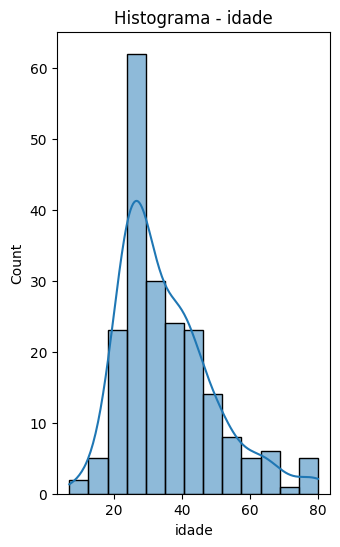

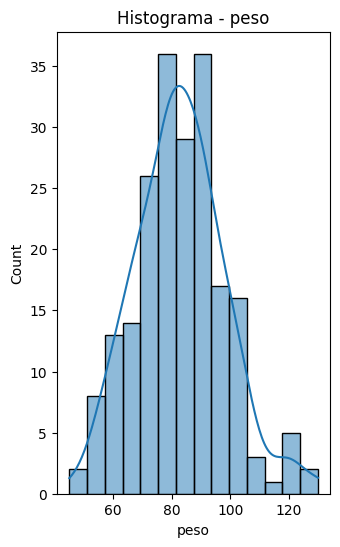

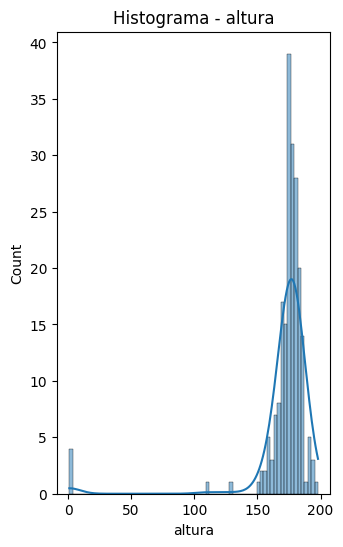

In [18]:
# Analise de normalidade do sexo Masculino

for coluna in quantitativas:
    serie = df_masculino2[coluna].dropna()  # Remover valores nulos

    # Teste Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(serie)

    # Teste D’Agostino e Pearson (Normaltest)
    stat_normal, p_normal = normaltest(serie)

    # Adicionar resultados
    resultados[coluna] = {
        'Shapiro-Wilk': {'estatística': stat_shapiro, 'p-valor': p_shapiro},
    }

    # Visualizações
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 3, 1)
    sns.histplot(serie, kde=True)
    plt.title(f"Histograma - {coluna}")

# Exibir resultados
print("Resultados dos Testes de Normalidade Masculino:")
for coluna, teste in resultados.items():
    print(f"\nVariável: {coluna}")
    for nome, valores in teste.items():
        print(f"  {nome}: Estatística = {valores['estatística']:.4f}, p-valor = {valores['p-valor']:.4f}")

Resultados dos Testes de Normalidade Feminino:

Variável: idade
  Shapiro-Wilk: Estatística = 0.9349, p-valor = 0.0000

Variável: peso
  Shapiro-Wilk: Estatística = 0.9422, p-valor = 0.0000

Variável: altura
  Shapiro-Wilk: Estatística = 0.4346, p-valor = 0.0000


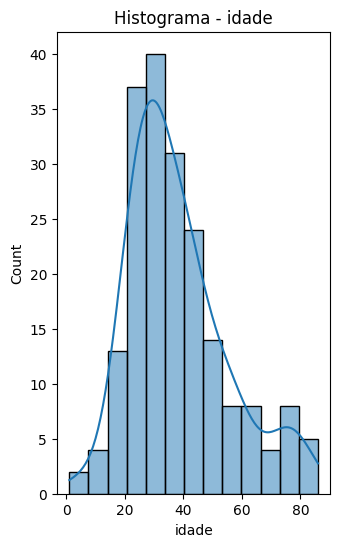

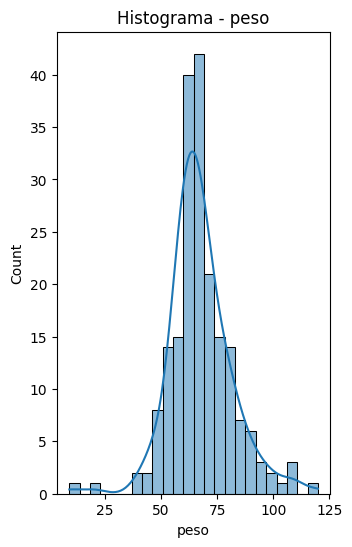

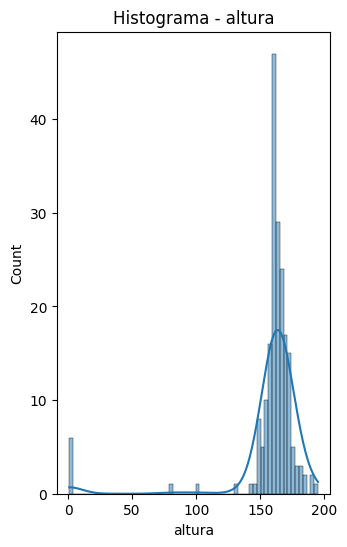

In [19]:
# Analise de normalidade do sexo feminino

for coluna in quantitativas:
    serie = df_feminino2[coluna].dropna()  # Remover valores nulos

    # Teste Shapiro-Wilk
    stat_shapiro, p_shapiro = shapiro(serie)

    # Teste D’Agostino e Pearson (Normaltest)
    stat_normal, p_normal = normaltest(serie)

    # Adicionar resultados
    resultados[coluna] = {
        'Shapiro-Wilk': {'estatística': stat_shapiro, 'p-valor': p_shapiro},
    }

    # Visualizações
    plt.figure(figsize=(12, 6))

    # Histograma
    plt.subplot(1, 3, 1)
    sns.histplot(serie, kde=True)
    plt.title(f"Histograma - {coluna}")

# Exibir resultados
print("Resultados dos Testes de Normalidade Feminino:")
for coluna, teste in resultados.items():
    print(f"\nVariável: {coluna}")
    for nome, valores in teste.items():
        print(f"  {nome}: Estatística = {valores['estatística']:.4f}, p-valor = {valores['p-valor']:.4f}")

#### Conclusão

Os três testes de normalidade (para idade, peso e altura) indicam que os dados não seguem uma distribuição normal. O p-valor de 0.0000 em todos os casos é suficientemente baixo para rejeitar a hipótese de normalidade com um alto nível de confiança.

### Testes de Independência

In [20]:
# Variáveis de interesse
atributos = ['consumo_alcool', 'fumante', 'exercícios', 'dieta']

In [22]:
# Realizar o teste de qui-quadrado para cada variável
for atributo in atributos:
    # Criar tabela de contingência
    tabela_contingencia = pd.crosstab(df['sexo'], df[atributo])
    
    # Aplicar o teste qui-quadrado
    chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)
    
    # Mostrar os resultados
    print(f"Teste de independência entre sexo e {atributo}:")
    print(f"p-valor: {p_valor:.4f}")
    if p_valor < 0.05:
        print("Resultado: Existe uma associação significativa entre sexo e", atributo)
    else:
        print("Resultado: Não existe uma associação significativa entre sexo e", atributo)
    print("-" * 50)

Teste de independência entre sexo e consumo_alcool:
p-valor: 0.0051
Resultado: Existe uma associação significativa entre sexo e consumo_alcool
--------------------------------------------------
Teste de independência entre sexo e fumante:
p-valor: 0.2244
Resultado: Não existe uma associação significativa entre sexo e fumante
--------------------------------------------------
Teste de independência entre sexo e exercícios:
p-valor: 0.2949
Resultado: Não existe uma associação significativa entre sexo e exercícios
--------------------------------------------------
Teste de independência entre sexo e dieta:
p-valor: 0.0221
Resultado: Existe uma associação significativa entre sexo e dieta
--------------------------------------------------


#### Conclusão

* Consumo de Álcool e Dieta apresentaram uma associação significativa com o sexo, indicando que o comportamento em relação a essas variáveis pode ser diferente entre homens e mulheres.
* Fumante e Exercícios não mostraram uma associação significativa com o sexo, sugerindo que, na amostra, esses comportamentos são mais independentes do sexo.

### Teste de Homogeneídade

In [23]:
# Variáveis categóricas para análise de homogeneidade

categorias = ['estado_civil', 'escolaridade', 'consumo_alcool', 'fumante', 'exercícios', 'dieta']

In [24]:
# Realizar o teste de qui-quadrado de homogeneidade
for categoria in categorias:
    # Criar a tabela de contingência para a variável com a separação por sexo
    tabela_contingencia = pd.crosstab(df['sexo'], df[categoria])
    
    # Aplicar o teste qui-quadrado de homogeneidade
    chi2, p_valor, dof, expected = chi2_contingency(tabela_contingencia)
    
    # Exibir os resultados
    print(f"Teste de homogeneidade entre sexo e {categoria}:")
    print(f"p-valor: {p_valor:.4f}")
    if p_valor < 0.05:
        print(f"Resultado: Não existe homogeneidade entre as distribuições de {categoria} por sexo.")
    else:
        print(f"Resultado: Existe homogeneidade entre as distribuições de {categoria} por sexo.")
    print("-" * 50)

Teste de homogeneidade entre sexo e estado_civil:
p-valor: 0.0006
Resultado: Não existe homogeneidade entre as distribuições de estado_civil por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e escolaridade:
p-valor: 0.8696
Resultado: Existe homogeneidade entre as distribuições de escolaridade por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e consumo_alcool:
p-valor: 0.0051
Resultado: Não existe homogeneidade entre as distribuições de consumo_alcool por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e fumante:
p-valor: 0.2244
Resultado: Existe homogeneidade entre as distribuições de fumante por sexo.
--------------------------------------------------
Teste de homogeneidade entre sexo e exercícios:
p-valor: 0.2949
Resultado: Existe homogeneidade entre as distribuições de exercícios por sexo.
--------------------------------------------------
Teste de hom

#### Conclusão

A análise de homogeneidade revelou que:
* Estado Civil, Consumo de Álcool e Dieta apresentam distribuições significativamente diferentes entre homens e mulheres, indicando falta de homogeneidade.
* Escolaridade, Fumante e Exercícios têm distribuições semelhantes entre os grupos de sexo, indicando homogeneidade.

### Criando Dataset *Homogêneo* a partir de uma variável categórica

In [25]:
# Calcular as proporções globais da variável "dieta"
proporcoes_globais = df['dieta'].value_counts(normalize=True)
print("Proporções globais de dieta:")
print(proporcoes_globais)

# Criar um dataset homogêneo
df_homogeneo = pd.DataFrame()

for sexo in df['sexo'].unique():
    grupo = df[df['sexo'] == sexo]
    
    # Redistribuir as categorias de "dieta" conforme as proporções globais
    for categoria, proporcao in proporcoes_globais.items():
        n_amostras = int(proporcao * len(grupo))
        amostra = grupo[grupo['dieta'] == categoria].sample(n=n_amostras, replace=True, random_state=42)
        df_homogeneo = pd.concat([df_homogeneo, amostra])

Proporções globais de dieta:
dieta
1    0.678133
4    0.194103
2    0.081081
3    0.046683
Name: proportion, dtype: float64


In [26]:
df_homogeneo

,pesquisador (aluno),pesq_id,cep,idade,sexo,peso,altura,estado_civil,escolaridade,consumo_alcool,fumante,exercícios,dieta
268,Larissa de Almeida Ribeiro,3,23915060,27,M,60,160,1,2,2,3,3,1
238,Joao Pedro Ciglioni Garcia,7,3170500,24,M,85,185,1,5,4,2,4,1
57,Carlos Augusto Reis,21,6730000,35,M,80,174,4,4,6,4,4,1
281,Lenon Alcântara Machado,15,7500000,19,M,65,173,1,5,6,4,3,1
180,Grasiely Lima Pastori Vieira,30,56789012,27,M,82,185,2,4,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,Leonardo de Souza Silva,6,24680135,29,F,58,160,1,3,3,4,2,3
383,Ryan de Oliveira Queiroz,32,2543000,77,F,79,176,1,3,4,4,1,3
37,Bruno Britto dos Santos,9,05012-040,31,F,68,160,2,5,4,2,2,3
294,Leonardo de Souza Silva,6,24680135,29,F,58,160,1,3,3,4,2,3
